# UN Data Analysis



Analysis on UN Data comparing GDP per capita and internet usage

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline






Create three new data frames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab for auto-complete options).

Which country had the lowest percentage of internet users in 2014? What was the percentage?

Repeat for 2004 and 2009.

Which country had the highest gdp per capita in 2014? What was the gdp per capita?

Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita
b. 2009 Percent Using the Internet vs GDP Per Capita
c. 2014 Percent Using the Internet vs GDP Per Capita

Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

Look at the distribution of gdp per capita values for 2014. Is it unimodal?

Look at the distribution of Internet Use for 2014. Is it unimodal?

What are the top 5 countries in terms of internet use in 2014?

Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries. You should have 15 rows. Check that this is true.

Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Is there a plotting issue with Bermuda? Can you fix it?

Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

Find the top 5 countries for 2014 in terms of GDP per capita; create a dataframe to look at 10-year trends in gdp per capita for those 5 countries. Use a seaborn facet grid for this.

Repeat this one more time to look at 10-year trend for the bottom 5 countries for 2014 in terms of GDP per capita.

Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

Bonus exercise:
Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

In [3]:
## Load Data


In [4]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv', nrows =6729)

In [5]:
gdp_df.head()


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [6]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)

In [7]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


# Look at the shape of each dataframe - how many rows, how many columns.


In [8]:
gdp_df.shape


(6729, 4)

In [9]:
internet_df.shape

(4495, 4)

### Take a look at the data types for the columns in each table.

In [10]:
type("Country or Area")

str

In [11]:
type("year")


str

In [12]:
type("value")

str

In [13]:
type('value footnotes')

str

In [14]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   int64  
 2   Value            6729 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 210.4+ KB


In [15]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

### Take a look at the last 10 rows of each dataset in turn.

In [16]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [17]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


### Drop the 'value footnotes' data (column) from both datasets. Check that this worked as expected.

In [18]:
del gdp_df["Value Footnotes"]

In [19]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [20]:
del internet_df['Value Footnotes']

In [21]:
internet_df.head(
)

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


### 11.Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.


In [22]:
gdp_df.columns=["Country","Year","GDP_Per_Capita"]

In [23]:
gdp_df.rename(columns = {'Country or Area':'Country'})

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834
...,...,...,...
6724,Zimbabwe,1994,2768.309953
6725,Zimbabwe,1993,2572.870395
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849


In [24]:
gdp_df=gdp_df.rename(columns = {'Value':"GDP_Per_Capita"})

### 12.Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [25]:
#internet_df['Year']= internet_df['Year'].astype(int).astype(object)

In [26]:
internet_df.columns=["Country","Year","Internet_Users_Pct"]

In [27]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [28]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


### 13. Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.


In [29]:
merged_df = pd.merge(gdp_df,internet_df, on=['Country','Year'], how='outer')

In [30]:
merged_df.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


### 14. 
Look at the first five rows of your new data frame to confirm it merged correctly.

In [31]:
merged_df.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645
7704,Virgin Islands (U.S.),1990,NaN,0.000000


### 15. Look at the last five rows to make sure the data is clean and as expected.

### 16.Subset the combined data frame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [32]:
three_years = merged_df[(merged_df.Year == 2004)|(merged_df.Year == 2009)|(merged_df.Year == 2014)]

In [33]:
three_years.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.390000
9,Afghanistan,2009,1502.354073,3.550000
14,Afghanistan,2004,1025.208245,0.105809
21,Albania,2014,10700.993216,60.100000
26,Albania,2009,9525.377979,41.200000


### 17.Create three new data frames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [34]:
year2004_df = three_years[three_years.Year == 2004]

In [35]:
year2004_df.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2004,1025.208245,0.105809
31,Albania,2004,7001.054082,2.420388
60,Algeria,2004,11845.170512,4.634475
89,Angola,2004,4604.657044,0.464815
118,Antigua and Barbuda,2004,21161.123532,24.266544


In [36]:
year2009_df = three_years[three_years.Year == 2009]

In [37]:
year2014_df = three_years[three_years.Year == 2014]

### 18.Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab for auto-complete options).

In [38]:
pct = year2014_df['Internet_Users_Pct']
max_pct = pct.max()

In [39]:
print(max_pct)

98.16


In [40]:
max_pct_country = year2014_df[year2014_df['Internet_Users_Pct']== 98.16]

In [41]:
print(max_pct_country)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2581  Iceland  2014    42774.888849               98.16


### 19.Which country had the lowest percentage of internet users in 2014? What was the percentage?






In [42]:
min_pct = pct.min()
print(min_pct)

0.0


In [43]:
min_pct_country = year2014_df[year2014_df['Internet_Users_Pct']== 0]
print(min_pct_country)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6940  Dem. People's Rep. of Korea  2014             NaN                 0.0


### 20.Repeat for 2004 and 2009.

In [44]:
pct2004= year2004_df['Internet_Users_Pct']
max_pct2004 = pct2004.max()
print(max_pct2004)

83.89


In [45]:
max_pct_country2004 = year2004_df[year2004_df['Internet_Users_Pct'] == 83.89]
print(max_pct_country2004)

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
5852  Sweden  2004    40177.850408               83.89


In [46]:
min_pct2004 = pct2004.min()
print(min_pct2004)

0.0


In [47]:
min_pct_country2004 = year2004_df[year2004_df['Internet_Users_Pct']==0.0]
print(min_pct_country2004)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6949  Dem. People's Rep. of Korea  2004             NaN                 0.0


In [48]:
pct2009=year2009_df['Internet_Users_Pct']
max_pct2009 = pct2009.max()
print(max_pct2009)

93.0


In [49]:
max_pct_country2009 = year2009_df[year2009_df['Internet_Users_Pct'] == 93.0]
print(max_pct_country2009)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2586  Iceland  2009    41505.084834                93.0


In [50]:
min_pct2009 = pct2009.min()
print(min_pct2009)

0.0


In [51]:
min_pct_country2009 = year2009_df[year2009_df['Internet_Users_Pct'] == 0.0]
print(min_pct_country2009)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6944  Dem. People's Rep. of Korea  2009             NaN                 0.0


In [52]:
year2009_df.sort_values('Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6944,Dem. People's Rep. of Korea,2009,NaN,0.000000
6049,Timor-Leste,2009,9275.529371,0.185252
4233,Myanmar,2009,3387.818242,0.220000
5292,Sierra Leone,2009,1172.862734,0.260000
886,Cambodia,2009,2417.293669,0.530000
...,...,...,...,...
6020,The Gambia,2009,2467.890291,NaN
6423,Upper middle income,2009,11631.478894,NaN
6568,Vietnam,2009,4207.756178,NaN
6597,West Bank and Gaza,2009,3816.165070,NaN


### 21.Which country had the highest gdp per capita in 2014? What was the gdp per capita?


In [53]:
gdp2014 = year2014_df['GDP_Per_Capita']
max_gdp2014 = gdp2014.max()
print(max_gdp2014)

130439.106673897


In [54]:
max_gdp_country2014 = year2014_df[year2014_df['GDP_Per_Capita'] ==130439.106673897 ]
print(max_gdp_country2014)

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
3639  Macao SAR, China  2014   130439.106674                 NaN


### 22.Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [55]:
 min_gdp2014= year2014_df['GDP_Per_Capita'].min()

In [56]:
print(min_gdp2014)

672.681648275246


In [57]:
min_gdp_country2014 = year2014_df[year2014_df['GDP_Per_Capita']==672.681648275246]
min_gdp_country2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.681648,NaN


In [58]:
year2014_df.loc[year2014_df['GDP_Per_Capita'].idxmax()]

Country               Macao SAR, China
Year                              2014
GDP_Per_Capita                  130439
Internet_Users_Pct                 NaN
Name: 3639, dtype: object

In [59]:
year2014_df.loc[year2014_df['GDP_Per_Capita'].idxmin()]

Country               Central African Republic
Year                                      2014
GDP_Per_Capita                         672.682
Internet_Users_Pct                         NaN
Name: 1014, dtype: object

### 23.Create some scatterplots: a. 2004 Percent Using the Internet vs GDP Per Capita b. 2009 Percent Using the Internet vs GDP Per Capita c. 2014 Percent Using the Internet vs GDP Per Capita

Text(0.5, 1.0, '2014')

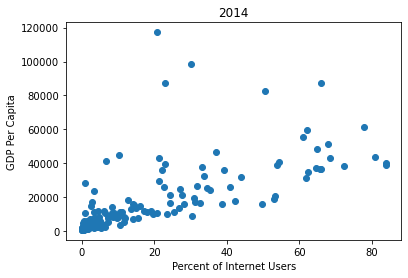

In [60]:
plt.scatter(year2004_df['Internet_Users_Pct'], year2004_df['GDP_Per_Capita'])
plt.xlabel('Percent of Internet Users')
plt.ylabel('GDP Per Capita')
plt.title('2014')

Text(0.5, 1.0, '2009')

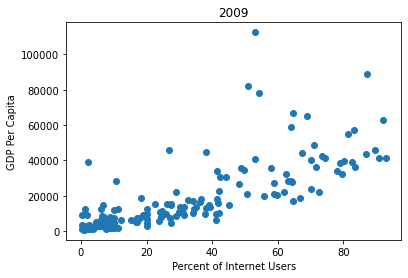

In [61]:
plt.scatter(year2009_df["Internet_Users_Pct"], year2009_df['GDP_Per_Capita'])
plt.xlabel('Percent of Internet Users')
plt.ylabel('GDP Per Capita')
plt.title('2009')

Text(0.5, 1.0, '2004')

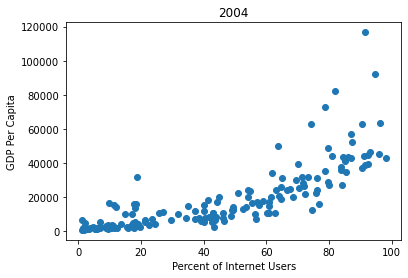

In [62]:
plt.scatter(year2014_df["Internet_Users_Pct"], year2014_df['GDP_Per_Capita'])
plt.xlabel('Percent of Internet Users')
plt.ylabel('GDP Per Capita')
plt.title(2004)

### 24.Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.





#### The relationship between these two variables becomes more positively correlated as the years go on. There are fewer outliers and for the most part by 2014, internet usage goes up as GDP goes up. 

### 25.Look at the distribution of gdp per capita values for 2014. Is it unimodal?

#### GDP Per Capita is NOT unimodal. 

### 26.Look at the distribution of Internet Use for 2014. Is it unimodal?

#### No it is not Unimodal.

### 27.What are the top 5 countries in terms of internet use in 2014?







In [63]:
top5internet2014= year2014_df.nlargest(5,'Internet_Users_Pct')
top5internet2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16
6772,Bermuda,2014,NaN,96.80
4530,Norway,2014,63328.259526,96.30
1404,Denmark,2014,45057.083449,95.99
6732,Andorra,2014,NaN,95.90


### 28.Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries. You should have 15 rows. Check that this is true.

In [64]:
top5internet2009 = year2009_df.nlargest(5,'Internet_Users_Pct')
top5internet2009

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2586,Iceland,2009,41505.084834,93.00
4535,Norway,2009,62617.153609,92.08
5847,Sweden,2009,41327.626252,91.00
4332,Netherlands,2009,45724.862764,89.63
3615,Luxembourg,2009,89098.734264,87.31


In [65]:
top5internet2004 = year2004_df.nlargest(5,'Internet_Users_Pct')
top5internet2004

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5852,Sweden,2004,40177.850408,83.89
2591,Iceland,2004,38893.378798,83.88
1414,Denmark,2004,43670.446201,80.93
4540,Norway,2004,61612.275634,77.69
7247,Korea (Rep. of),2004,NaN,72.70


In [66]:
merged_top_internet = pd.merge(top5internet2014,top5internet2009,  how ='outer')

In [67]:
total_merged = pd.merge(merged_top_internet, top5internet2004,  how = 'outer')

In [68]:
total_merged.head(15)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Iceland,2014,42774.888849,98.16
1,Bermuda,2014,NaN,96.80
2,Norway,2014,63328.259526,96.30
3,Denmark,2014,45057.083449,95.99
4,Andorra,2014,NaN,95.90
5,Iceland,2009,41505.084834,93.00
6,Norway,2009,62617.153609,92.08
7,Sweden,2009,41327.626252,91.00
8,Netherlands,2009,45724.862764,89.63
9,Luxembourg,2009,89098.734264,87.31


### 29.Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?  Bermuda. Is there a plotting issue with Bermuda? No. Can you fix it?

In [69]:
three_years.head(3
                )

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.390000
9,Afghanistan,2009,1502.354073,3.550000
14,Afghanistan,2004,1025.208245,0.105809


In [70]:
top_5_over_time = three_years.loc[(three_years['Country']== 'Iceland')|(three_years['Country']=='Bermuda')|(three_years['Country']=='Norway')|(three_years['Country']=='Denmark')|(three_years['Country']=='Andorra')]

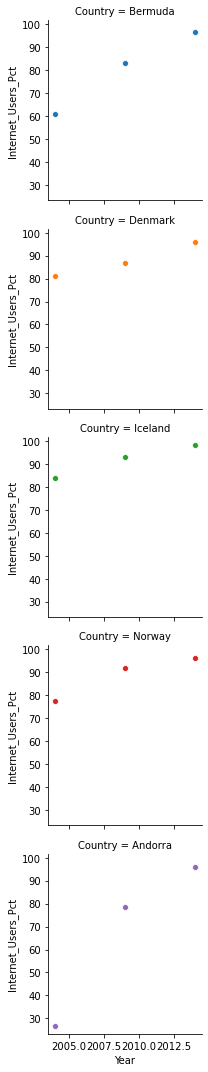

In [71]:
usage_over_time_top_5 = sns.FacetGrid(top_5_over_time, row='Country', hue='Country')
usage_over_time_top_5.map(sns.scatterplot, "Year", "Internet_Users_Pct")

### 30.Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

### Consistently lowest internet use: Dem. People's Republic of Korea

In [72]:
lowest2014 = year2014_df.nsmallest(5, 'Internet_Users_Pct')
print(lowest2014)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6940  Dem. People's Rep. of Korea  2014             NaN                0.00
6999                      Eritrea  2014             NaN                0.99
6044                  Timor-Leste  2014     6466.737732                1.14
794                       Burundi  2014      768.469837                1.38
7521                      Somalia  2014             NaN                1.63


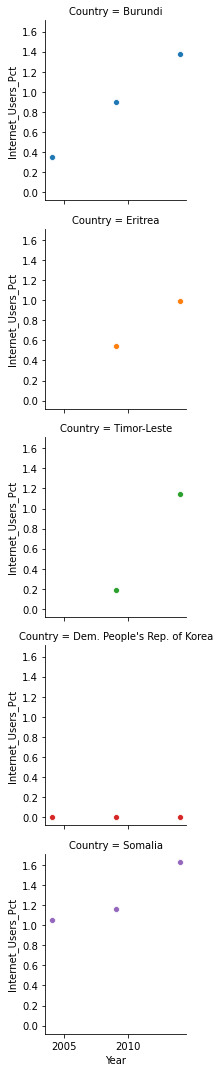

In [73]:
lowest_5_over_time = three_years.loc[(three_years['Country']== "Dem. People's Rep. of Korea")|(three_years['Country']=='Eritrea')|(three_years['Country']=='Timor-Leste')|(three_years['Country']=='Burundi')|(three_years['Country']=='Somalia')]
usage_over_time_lowest_5 = sns.FacetGrid(lowest_5_over_time, row='Country', hue='Country')
usage_over_time_lowest_5.map(sns.scatterplot, "Year", "Internet_Users_Pct")

### 31. Find the top 5 countries for 2014 in terms of GDP per capita; create a dataframe to look at 10-year trends in gdp per capita for those 5 countries. Use a seaborn facet grid for this.




In [74]:
top5GDP2014 = year2014_df.nlargest(5,'GDP_Per_Capita')
top5GDP2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3639,"Macao SAR, China",2014,130439.106674,NaN
5003,Qatar,2014,116693.507701,91.49
3610,Luxembourg,2014,92349.186429,94.67
5316,Singapore,2014,81965.361071,82.00
707,Brunei,2014,76448.593329,NaN


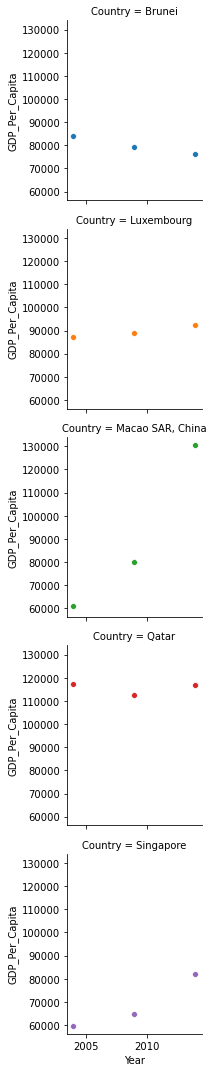

In [75]:
gdptrend = three_years.loc[(three_years['Country']== "Macao SAR, China")|(three_years['Country']=='Qatar')|(three_years['Country']=='Luxembourg')|(three_years['Country']=='Singapore')|(three_years['Country']=='Brunei')]
gdptrendplot = sns.FacetGrid(gdptrend, row='Country', hue='Country')
gdptrendplot.map(sns.scatterplot, "Year", "GDP_Per_Capita")

### 32. Repeat this one more time to look at 10-year trend for the bottom 5 countries for 2014 in terms of GDP per capita.

In [76]:
gdplowest = year2014_df.nsmallest(5,'GDP_Per_Capita')
gdplowest

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.681648,NaN
794,Burundi,2014,768.469837,1.38
1375,Dem. Rep. Congo,2014,784.872656,NaN
4414,Niger,2014,900.136918,1.95
3697,Malawi,2014,1142.530804,5.83


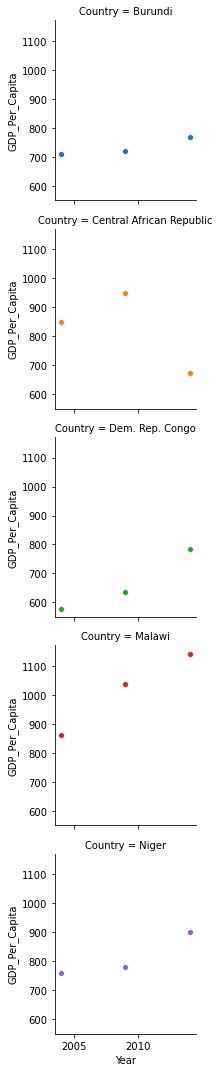

In [77]:

gdplowest_over_time = three_years.loc[(three_years['Country']== "Central African Republic")|(three_years['Country']=='Burundi')|(three_years['Country']=='Dem. Rep. Congo')|(three_years['Country']=='Niger')|(three_years['Country']=='Malawi')]
gdplowest_over_time_plot = sns.FacetGrid(gdplowest_over_time, row='Country', hue='Country')
gdplowest_over_time_plot.map(sns.scatterplot, "Year", "GDP_Per_Capita")




### 33.Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

#### Severe civil unrest and armed conflicts affect economic growth in Central African Republic.


### 34. Bonus exercise: Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

In [78]:
ElemEdRatio = pd.read_csv('../data/ElementaryRatios.csv', nrows=117)


### Ratio of girls to boys starting 1st grade who reach 5th grade.


In [79]:
ElemEdRatio.head

<bound method NDFrame.head of                         Country or Area Subgroup       Year  \
0                               Albania    Total  2008-2011   
1                               Algeria    Total  2008-2011   
2                                Angola    Total  2008-2011   
3                             Argentina    Total  2008-2011   
4                               Austria    Total  2008-2011   
..                                  ...      ...        ...   
112                          Uzbekistan    Total  2008-2011   
113                             Vanuatu    Total  2008-2011   
114  Venezuela (Bolivarian Republic of)    Total  2008-2011   
115          Western and Central Africa    Total  2008-2011   
116                               World    Total  2008-2011   

                                       Source   Unit  Value  Value Footnotes  
0    UN_UNESCO Institute for Statistics (UIS)  Ratio    100                1  
1    UN_UNESCO Institute for Statistics (UIS)  Ratio   

In [80]:
Ratio = ElemEdRatio.drop(['Year','Source','Unit','Subgroup','Value Footnotes'], axis=1)


In [81]:
Ratio.sort_values('Value')

,Country or Area,Value
2,Angola,73
43,Guinea,76
27,Democratic Republic of the Congo,88
110,United States,89
19,Central African Republic,90
...,...,...
16,Burundi,118
89,Sao Tome and Principe,121
97,Suriname,122
103,Togo,123


In [82]:
PrimaryRatio = pd.read_csv('../data/GrossEnrollmentOfGirlsToBoysInPrimaryEducation.csv', nrows=181)

In [83]:
PrimaryRatio.head
PrimaryRatio = PrimaryRatio.drop(['Year','Source','Unit','Subgroup'], axis=1)


In [84]:
sorted_countries = PrimaryRatio.sort_values('Value')
sorted_countries

,Country or Area,Value,Value Footnotes
0,Afghanistan,69,1
30,Central African Republic,71,1
31,Chad,73,1
4,Angola,81,1
122,Pakistan,82,1
...,...,...,...
70,Guyana,104,1
104,Mauritania,105,1
114,Nauru,106,1
143,Senegal,106,1


In [86]:
sorted_countries.head(30)

,Country or Area,Value,Value Footnotes
0,Afghanistan,69,1
30,Central African Republic,71,1
31,Chad,73,1
4,Angola,81,1
122,Pakistan,82,1
118,Niger,82,1
180,Yemen,82,1
39,Côte d'Ivoire,83,1
68,Guinea,84,1
55,Eritrea,84,1


In [93]:
USRatio=PrimaryRatio[PrimaryRatio['Country or Area']=='United States']
USRatio

,Country or Area,Value,Value Footnotes
172,United States,99,1
Country or Area,United States,United States,United States


In [94]:
PrimaryRatio.loc[PrimaryRatio['Country or Area']== 'United States']

,Country or Area,Value,Value Footnotes
172,United States,99,1
Country or Area,United States,United States,United States
